In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in glob(os.path.join('../data/M49/raw/', 'j*_flc.fits')):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/M49/raw/M49_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
files = {'F475W': ['../data/M49/raw/M49_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)],
         'F850LP': ['../data/M49/raw/M49_F850LP_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)]}
outputs = {'F475W': '../data/M49/reduced/M49_F475W_drc.fits',
          'F850LP': '../data/M49/reduced/M49_F850LP_drc.fits'}
diff_im = '../data/M49/reduced/M49_g-z.fits'
darks = {}

# Alignment and Drizzling

In [6]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M49/calibration/'

In [7]:
# %%time
# ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F850LP', verbose=True)

*******************************
Initial Alignment and Drizzling
--F850LP: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F850LP', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 11:53:52.364 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F850LP_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F850LP_EXP2_flc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F8

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: 6.164589228310706e-06 1.2910920373710049e-05
CD_21  CD_22: 1.239862153825702e-05 -5.346230801361865e-06
CRVAL    : 187.42587961523458 8.008226043623988
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04984745939604723
ORIENTAT : 112.49375911114504
WCSNAME  :  TWEAK_F850LP

Processing /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: 6.256685268366125e-06 1.251914911336115e-05
CD_21  CD_22: 1.2171368408829625e-05 -5.073475547769549e-06
CRVAL    : 187.45284837709542 7.997231590524578
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04926694471483187
ORIENTAT : 112.06060717094125
WCSNAME  :  TWEAK_F850LP


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: 6.164586911301585e-06 1.291092086127944e-05
CD_21  CD_22: 1.2398622185534444e-05 -5.346228426602669e-06
CRVAL    : 187.42587962874012 8.008226005880797
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049847457770161814
ORIENTAT : 112.49374935020683
WCSNAME  :  TWEAK_F850LP

Processing /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M49/raw/M49_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: 6.2566829885634364e-06 1.2519149563901337e-05
CD_21  CD_22: 1.2171369073539609e-05 -5.0734732523e-06
CRVAL    : 187.45284839160365 7.997231557692959
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04926694310183369
ORIENTAT : 112.06059742960402
WCSNAME  :  TWEAK_F850LP
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/M49/reduced/M49_F475W_drc.fits
{'clean': 

In [9]:
# from drizzlepac import tweakreg
# tweakreg.TweakReg([outputs['F850LP'], outputs['F475W']], conv_width=4.0, threshold=200, shiftfile=False, writecat=False, clean=True,
#                  interactive=False)

In [10]:
# Create difference image to check alignment
f1 = fits.open(outputs['F850LP'])
f2 = fits.open(outputs['F475W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [11]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F850LP'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 3min 53s, sys: 5.7 s, total: 3min 59s
Wall time: 4min 23s


In [12]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F850LP'], threshold=10.0)

CPU times: user 4.15 s, sys: 5.96 s, total: 10.1 s
Wall time: 14.2 s


# Manual Source Extraction

In [14]:
ppy.data.sources.mask_sources_manual(outputs['F850LP'], '../data/M49/masks/M49_F850LP.reg')

In [16]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F850LP'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [6]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [7]:
ppy.data.extraction.add_regions(outputs, '../data/M49/masks/M49_F850LP_contours.reg', base_filter='F850LP', xc=2418, yc=2614)

100%|██████████| 85/85 [05:49<00:00,  4.11s/it]


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

# Extract PCMDs

In [19]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F850LP', 'F475W', path='../data/M49/pcmds/', name_append='M49_z_gz')

Filter: F850LP
Observation Date: 52809 (MJD)
Vega ZeroPoint: 24.3530
AB ZeroPoint: 24.8788
ST ZeroPoint: 25.9668
Exposure Time: 1120.0
A pre-made filter is available
Filter: F475W
Observation Date: 52809 (MJD)
Vega ZeroPoint: 26.1746
AB ZeroPoint: 26.0820
ST ZeroPoint: 25.7713
Exposure Time: 750.0
A pre-made filter is available


100%|██████████| 340/340 [00:44<00:00,  7.62it/s]


# Check

In [34]:
pcmds = {}
for i in tqdm(range(1, 341)):
    filename = f'../data/M49/pcmds/M49_z_gz_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if pcmds[i].ndim < 2:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 340/340 [00:37<00:00,  9.19it/s]


In [35]:
keys = np.array(list(pcmds.keys()))

In [36]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [37]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

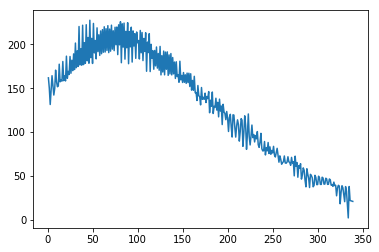

In [38]:
plt.plot(Neffs.keys(), Neffs.values())

In [39]:
f = ppy.instrument.default_m49_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [40]:
dmod = 31.0

In [41]:
ppy.distancemodels.dmod_to_mpc(31.0)

15.848931924611142

In [42]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [43]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [44]:
sky = [56.9, 50.1]

In [45]:
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky)

In [47]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        if len(pcmd[0]) <= 10:
            continue
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
        ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([28, 21])
    plt.tight_layout()
    plt.savefig(f'figures/M49/M49_s{i}_pcmds.pdf')
    plt.close()

100%|██████████| 85/85 [02:14<00:00,  1.58s/it]
